##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas import json_normalize
import json
import os


##Dataset Preparation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Features Extraction of Benign PDF Files.

In [ ]:
# Specifying the path to the "benign" folder in my Google Drive
benign_folder_path = "/content/drive/MyDrive/benign"

# Listing contents of the "benign" folder
!ls "$benign_folder_path"


Streaming output truncated to the last 5000 lines.
 00acb13f1b52f499bc34b08b185c9fb55063d8e0af01031d70cb730cb5aa68a6.properties.json
 00c8e10fd12ae74b42605730d428917e864abf15dcd45d2ec44b7bd9b8a8bb30.properties.json
 00df64b70fdabceb103c65e8d356dda08b14f69342b4c77b5d39182bef0dd100.properties.json
 00f2c8ddd9c58430bc62a8b84e8732d5cc791ace424415888d3480fdaa2bad24.properties.json
 00f6f63b88edcfde695e4b5151889224a7085d6b085c1bca520da17b7b533586.properties.json
 01086568f07b69444129e03506cf5e48438fc1b5fff95617ccabef576fdc6b73.properties.json
 010acd9b6e0cada665714588218b3e17162645272edf2874d2823ef289aecc8d.properties.json
 0134af8920c6b7a2f88495cd543ef134883a2de3295dcd16e0c019f8f64ef335.properties.json
 01351de5466133eea0f39f0f211c1256084f03f22b3ae0bdfec7b18270b671a2.properties.json
 0138b285fa96a1dd01fd6e6fd8f0c04c45d8b1255f6daa252a9e9b067fb82882.properties.json
 01640c32a3190f3015e9d6cd4ac0fcecdf2309bd410f4ce8185d91af47418f37.properties.json
 0169237edf975a3ba10e152f260b7d25fc70689ec59927

In [ ]:
# Specifying the destination directory in Colab
colab_destination_path = "/content/benign"

# Copying the contents of the "benign" folder to Colab
!cp -r "$benign_folder_path" "$colab_destination_path"

In [ ]:
# Listing contents of the copied "benign" folder in Colab
!ls "$colab_destination_path"


Streaming output truncated to the last 5000 lines.
 00acb13f1b52f499bc34b08b185c9fb55063d8e0af01031d70cb730cb5aa68a6.properties.json
 00c8e10fd12ae74b42605730d428917e864abf15dcd45d2ec44b7bd9b8a8bb30.properties.json
 00df64b70fdabceb103c65e8d356dda08b14f69342b4c77b5d39182bef0dd100.properties.json
 00f2c8ddd9c58430bc62a8b84e8732d5cc791ace424415888d3480fdaa2bad24.properties.json
 00f6f63b88edcfde695e4b5151889224a7085d6b085c1bca520da17b7b533586.properties.json
 01086568f07b69444129e03506cf5e48438fc1b5fff95617ccabef576fdc6b73.properties.json
 010acd9b6e0cada665714588218b3e17162645272edf2874d2823ef289aecc8d.properties.json
 0134af8920c6b7a2f88495cd543ef134883a2de3295dcd16e0c019f8f64ef335.properties.json
 01351de5466133eea0f39f0f211c1256084f03f22b3ae0bdfec7b18270b671a2.properties.json
 0138b285fa96a1dd01fd6e6fd8f0c04c45d8b1255f6daa252a9e9b067fb82882.properties.json
 01640c32a3190f3015e9d6cd4ac0fcecdf2309bd410f4ce8185d91af47418f37.properties.json
 0169237edf975a3ba10e152f260b7d25fc70689ec59927

##Loading Features to Dataset from json files.


Converting data from a JSON file to a Pandas DataFrame and extracting specific information.
Parameters:
- json_file_path (str): The path to the JSON file.
Returns:
- None: The function appends the extracted information to the global DataFrame new_df.

In [ ]:
new_df = pd.DataFrame()

def json_to_df(json_file_path):
    # Read data from JSON file
    with open(json_file_path) as f:
        data = json.load(f)

    # Normalize JSON data into a DataFrame
    df = json_normalize(data)

    # Dictionary to store extracted information
    L = {}

    # Extract specific information from DataFrame columns
    for col in df.columns.tolist():
        if col == 'file_size':
            L[f'{col}'] = df[col][0]
        elif col in ['pypdf_uris', 'regex_uris', 'regex_urls', 'scripts.iframe', 'scripts.urls']:
            L[f'{col}'] = len(df[col][0])
        elif col.startswith('static_properties.'):
            L[f'{col}'] = df[col][0]
        elif col == 'yara_signatures':
            yara_signatures_list = ['without_attachments', 'without_images', 'without_urls', 'invalid_trailer_structure', 'contentis_base64', 'Big_Numbers1', 'Big_Numbers0']
            for i in yara_signatures_list:
                L[f'{col}_{i}'] = any(i in x for x in df[col][0])
        else:
            pass

    # Set a target value (here, set as 0)
    L['target'] = 0

    # Append the dictionary to the global DataFrame new_df
    global new_df
    new_df = new_df.append(L, ignore_index=True)

# Example usage
benign_dir_path = "/content/benign"
json_files = [f for f in os.listdir(benign_dir_path) if f.endswith('.json')]
for json_file in json_files:
    json_file_path = os.path.join(benign_dir_path, json_file)
    json_to_df(json_file_path)

# Display the head of the DataFrame
new_df.head()


,file_size,pypdf_uris,regex_uris,regex_urls,yara_signatures_without_attachments,yara_signatures_without_images,yara_signatures_without_urls,yara_signatures_invalid_trailer_structure,yara_signatures_contentis_base64,yara_signatures_Big_Numbers1,...,static_properties.object_start,static_properties.object_streams,static_properties.open_action,static_properties.page_count,static_properties.rich_media,static_properties.start_cross_reference_table,static_properties.stream_end,static_properties.stream_start,static_properties.trailer_dictionary,target
0,516840,0,0,5,False,False,False,False,False,False,...,87,1,0,1,0,2,38,38,2,0
1,1383675,3,0,3,False,False,False,False,False,False,...,226,2,0,19,0,2,158,158,2,0
2,1284712,9,0,8,False,False,False,False,False,False,...,173,0,1,15,0,1,75,75,1,0
3,455619,2,0,4,True,True,False,False,True,True,...,156,0,0,7,0,2,106,106,2,0
4,2350818,0,0,7,False,False,False,False,False,False,...,65,0,0,10,0,1,47,47,1,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   file_size                                      5009 non-null   int64 
 1   pypdf_uris                                     5009 non-null   int64 
 2   regex_uris                                     5009 non-null   int64 
 3   regex_urls                                     5009 non-null   int64 
 4   yara_signatures_without_attachments            5009 non-null   bool  
 5   yara_signatures_without_images                 5009 non-null   bool  
 6   yara_signatures_without_urls                   5009 non-null   bool  
 7   yara_signatures_invalid_trailer_structure      5009 non-null   bool  
 8   yara_signatures_contentis_base64               5009 non-null   bool  
 9   yara_signatures_Big_Numbers1                   5009 non-null   

##Feature Engineering

In [ ]:
for col in  ['static_properties.file_size',
 'static_properties.java_script',
 'static_properties.js',
 'static_properties.launch_action',
 'static_properties.object_end',
 'static_properties.object_start',
 'static_properties.object_streams',
 'static_properties.open_action',
 'static_properties.page_count',
 'static_properties.rich_media',
 'static_properties.start_cross_reference_table',
 'static_properties.stream_end',
 'static_properties.stream_start']:
  new_df[col] = pd.to_numeric(new_df[col], errors='coerce')
  new_df[col].fillna(0, inplace=True)

In [ ]:
for col in new_df.columns.tolist():
  if col.startswith('yara_signatures'):
    new_df[col]=new_df[col].astype('int')

In [ ]:
for col in new_df.columns.tolist():
  if col.startswith('static_properties.'):
    new_df[col].fillna(0, inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   file_size                                      5009 non-null   int64  
 1   pypdf_uris                                     5009 non-null   int64  
 2   regex_uris                                     5009 non-null   int64  
 3   regex_urls                                     5009 non-null   int64  
 4   yara_signatures_without_attachments            5009 non-null   int64  
 5   yara_signatures_without_images                 5009 non-null   int64  
 6   yara_signatures_without_urls                   5009 non-null   int64  
 7   yara_signatures_invalid_trailer_structure      5009 non-null   int64  
 8   yara_signatures_contentis_base64               5009 non-null   int64  
 9   yara_signatures_Big_Numbers1                   5009 

In [ ]:
new_df['static_properties.trailer_dictionary']=new_df['static_properties.trailer_dictionary'].astype('int')

#Features Extraction of Malicious PDF Files.

In [ ]:
malicious_folder_path = "/content/drive/MyDrive/malicious"

!ls "$malicious_folder_path"


00099c2f8f24a4b3af162726ec3f907c9d4e2309500c62abe97412d5c31349f0.properties.json
0014bf0cb8f5565f87b89197c247ac1b8007b48c7d089f97b17d380678cfea25.properties.json
001f2c042f111e64fa335114c4e0062acf29142b1d804878552faedc2afeb0b8.properties.json
0038f2efa5c254bf0af55896ec3c267be2a078bd4f302a5122e8e2384348fcfa.properties.json
003fd9bb4e65e9f400c06bd2d0aa1716373eafab3298c9ea8760d3c1e8b46a63.properties.json
0040df54273aae2b2d70413e8acb81fb5b186a880cf234f38b6fc8fce45f5140.properties.json
0041881ce849f2d97f10a6b3fef402c8c8a2db4f4bd4593b778acb5fde5045ec.properties.json
0049bc48b0da7f516a1102d2f8c8c72c79c1a9aeb5c3304369c0c77e68f29aa5.properties.json
00707e8635405eed8b42cebe5c6a96ae8c90e9c7989c135906344ee22896ef4f.properties.json
0096c48c4fb095a38942c9c56a96e5922bbd353196cff3edaca3e1e389b52d78.properties.json
00cab5661f2540ac634fb82c82d79c20bb13a26cd6866cb170e40208792ad28a.properties.json
00ce43a8c3705002ea0a2fb43fcea16d96072ffb673d9d3032d3a46f88ee8bf6.properties.json
00cfb9b9e96e978f2d62eff868d0

In [ ]:
# Specifying the destination directory in Colab
colab_destination_path = "/content/malicious"

# Copying the contents of the "benign" folder to Colab
!cp -r "$malicious_folder_path" "$colab_destination_path"

In [ ]:
# List contents of the copied "benign" folder in Colab
!ls "$colab_destination_path"


00099c2f8f24a4b3af162726ec3f907c9d4e2309500c62abe97412d5c31349f0.properties.json
0014bf0cb8f5565f87b89197c247ac1b8007b48c7d089f97b17d380678cfea25.properties.json
001f2c042f111e64fa335114c4e0062acf29142b1d804878552faedc2afeb0b8.properties.json
0038f2efa5c254bf0af55896ec3c267be2a078bd4f302a5122e8e2384348fcfa.properties.json
003fd9bb4e65e9f400c06bd2d0aa1716373eafab3298c9ea8760d3c1e8b46a63.properties.json
0040df54273aae2b2d70413e8acb81fb5b186a880cf234f38b6fc8fce45f5140.properties.json
0041881ce849f2d97f10a6b3fef402c8c8a2db4f4bd4593b778acb5fde5045ec.properties.json
0049bc48b0da7f516a1102d2f8c8c72c79c1a9aeb5c3304369c0c77e68f29aa5.properties.json
00707e8635405eed8b42cebe5c6a96ae8c90e9c7989c135906344ee22896ef4f.properties.json
0096c48c4fb095a38942c9c56a96e5922bbd353196cff3edaca3e1e389b52d78.properties.json
00cab5661f2540ac634fb82c82d79c20bb13a26cd6866cb170e40208792ad28a.properties.json
00ce43a8c3705002ea0a2fb43fcea16d96072ffb673d9d3032d3a46f88ee8bf6.properties.json
00cfb9b9e96e978f2d62eff868d0

Converts data from a JSON file to a Pandas DataFrame and extracts specific information.

Parameters:
- json_file_path (str): The path to the JSON file.

Returns:
- None: The function appends the extracted information to the global DataFrame new_df1.


In [ ]:
new_df1 = pd.DataFrame()
def json_to_df(json_file_path):
    # Load the JSON file
    with open(json_file_path) as f:
        data = json.load(f)
    df = json_normalize(data)
    L = {}
    for col in df.columns.tolist():
        if col == 'file_size':
            L[f'{col}'] = df[col][0]
        elif col in ['pypdf_uris', 'regex_uris', 'regex_urls', 'scripts.iframe', 'scripts.urls']:
            L[f'{col}'] = len(df[col][0])
        elif col.startswith('static_properties.'):
            L[f'{col}'] = df[col][0]
        elif col == 'yara_signatures':
            yara_signatures_list = ['without_attachments', 'without_images', 'without_urls', 'invalid_trailer_structure', 'contentis_base64', 'Big_Numbers1', 'Big_Numbers0']
            for i in yara_signatures_list:
                L[f'{col}_{i}'] = any(i in x for x in df[col][0])
        else:
            pass
    L['target'] = 1
    # Append the dictionary to the global DataFrame new_df1
    global new_df1
    new_df1 = new_df1.append(L, ignore_index=True)
malicious_dir_path = "/content/malicious"
json_files = [f for f in os.listdir(malicious_dir_path) if f.endswith('.json')]
for json_file in json_files:
    json_file_path = os.path.join(malicious_dir_path, json_file)
    json_to_df(json_file_path)
# Display the head of the DataFrame
new_df1.head()

,file_size,pypdf_uris,regex_uris,regex_urls,yara_signatures_without_attachments,yara_signatures_without_images,yara_signatures_without_urls,yara_signatures_invalid_trailer_structure,yara_signatures_contentis_base64,yara_signatures_Big_Numbers1,...,static_properties.object_start,static_properties.object_streams,static_properties.open_action,static_properties.page_count,static_properties.rich_media,static_properties.start_cross_reference_table,static_properties.stream_end,static_properties.stream_start,static_properties.trailer_dictionary,target
0,89555,2,2,2,True,True,False,True,True,False,...,57,0,0,4,0,1,11,11,1,1
1,44156,22,22,22,True,True,False,True,True,False,...,60,0,0,3,0,1,7,7,1,1
2,47866,9,9,9,True,True,False,True,True,False,...,47,0,0,3,0,1,8,8,1,1
3,35030,22,22,22,True,True,False,True,True,False,...,55,0,0,2,0,1,6,6,1,1
4,103353,3,3,3,True,True,False,True,True,False,...,68,0,0,6,0,1,13,13,1,1


In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   file_size                                      4999 non-null   int64 
 1   pypdf_uris                                     4999 non-null   int64 
 2   regex_uris                                     4999 non-null   int64 
 3   regex_urls                                     4999 non-null   int64 
 4   yara_signatures_without_attachments            4999 non-null   bool  
 5   yara_signatures_without_images                 4999 non-null   bool  
 6   yara_signatures_without_urls                   4999 non-null   bool  
 7   yara_signatures_invalid_trailer_structure      4999 non-null   bool  
 8   yara_signatures_contentis_base64               4999 non-null   bool  
 9   yara_signatures_Big_Numbers1                   4999 non-null   

In [ ]:
new_df1

,file_size,pypdf_uris,regex_uris,regex_urls,yara_signatures_without_attachments,yara_signatures_without_images,yara_signatures_without_urls,yara_signatures_invalid_trailer_structure,yara_signatures_contentis_base64,yara_signatures_Big_Numbers1,...,static_properties.object_start,static_properties.object_streams,static_properties.open_action,static_properties.page_count,static_properties.rich_media,static_properties.start_cross_reference_table,static_properties.stream_end,static_properties.stream_start,static_properties.trailer_dictionary,target
0,89555,2,2,2,True,True,False,True,True,False,...,57,0,0,4,0,1,11,11,1,1
1,44156,22,22,22,True,True,False,True,True,False,...,60,0,0,3,0,1,7,7,1,1
2,47866,9,9,9,True,True,False,True,True,False,...,47,0,0,3,0,1,8,8,1,1
3,35030,22,22,22,True,True,False,True,True,False,...,55,0,0,2,0,1,6,6,1,1
4,103353,3,3,3,True,True,False,True,True,False,...,68,0,0,6,0,1,13,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,49587,22,22,22,True,True,False,True,True,False,...,65,0,0,4,0,1,8,8,1,1
4995,34997,22,22,22,True,True,False,True,True,False,...,50,0,0,1,0,1,5,5,1,1
4996,37093,22,22,22,True,True,False,True,True,False,...,55,0,0,2,0,1,6,6,1,1
4997,263126,30,30,36,True,True,False,True,True,False,...,84,0,0,4,0,2,17,17,2,1


#Data Cleaning and Feature Engineering.

In [ ]:
new_df1['static_properties.file_size'] = pd.to_numeric(new_df1['static_properties.file_size'], errors='coerce')
new_df1['static_properties.file_size'].fillna(0, inplace=True)
for col in ['static_properties.JBIG2Decode',
 'static_properties.XML_forms',
 'static_properties.acro_form',
 'static_properties.auto_action',
 'static_properties.colors',
 'static_properties.cross_reference_table',
 'static_properties.embedded_files',
 'static_properties.file_size',
 'static_properties.java_script',
 'static_properties.js',
 'static_properties.launch_action',
 'static_properties.object_end',
 'static_properties.object_start',
 'static_properties.object_streams',
 'static_properties.open_action',
 'static_properties.page_count',
 'static_properties.rich_media',
 'static_properties.start_cross_reference_table',
 'static_properties.stream_end',
 'static_properties.stream_start',
 'static_properties.trailer_dictionary']:
    new_df1[col]=new_df1[col].astype('int')

In [ ]:
for col in new_df1.columns.tolist():
  if col.startswith('yara_signatures'):
    new_df1[col]=new_df1[col].astype('int')

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   file_size                                      4999 non-null   int64
 1   pypdf_uris                                     4999 non-null   int64
 2   regex_uris                                     4999 non-null   int64
 3   regex_urls                                     4999 non-null   int64
 4   yara_signatures_without_attachments            4999 non-null   int64
 5   yara_signatures_without_images                 4999 non-null   int64
 6   yara_signatures_without_urls                   4999 non-null   int64
 7   yara_signatures_invalid_trailer_structure      4999 non-null   int64
 8   yara_signatures_contentis_base64               4999 non-null   int64
 9   yara_signatures_Big_Numbers1                   4999 non-null   int64
 10  

In [ ]:
new_df1['static_properties.file_size']=new_df1['static_properties.file_size'].astype('float')

Combining Benign and Malicious PDF Feature

In [ ]:
bm_file = pd.concat([new_df, new_df1], axis=0, ignore_index=True)
bm_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   file_size                                      10008 non-null  int64  
 1   pypdf_uris                                     10008 non-null  int64  
 2   regex_uris                                     10008 non-null  int64  
 3   regex_urls                                     10008 non-null  int64  
 4   yara_signatures_without_attachments            10008 non-null  int64  
 5   yara_signatures_without_images                 10008 non-null  int64  
 6   yara_signatures_without_urls                   10008 non-null  int64  
 7   yara_signatures_invalid_trailer_structure      10008 non-null  int64  
 8   yara_signatures_contentis_base64               10008 non-null  int64  
 9   yara_signatures_Big_Numbers1                   100

In [ ]:
for col in bm_file.columns:
  if bm_file[col].dtype=='object':
    bm_file[col]=bm_file[col].astype('int')

In [ ]:
bm_file.drop(columns=['scripts.iframe','scripts.urls','static_properties.rich_media'],inplace=True)

##Correlation between different Features.

In [ ]:
bm_file.corr()

,file_size,pypdf_uris,regex_uris,regex_urls,yara_signatures_without_attachments,yara_signatures_without_images,yara_signatures_without_urls,yara_signatures_invalid_trailer_structure,yara_signatures_contentis_base64,yara_signatures_Big_Numbers1,...,static_properties.object_end,static_properties.object_start,static_properties.object_streams,static_properties.open_action,static_properties.page_count,static_properties.start_cross_reference_table,static_properties.stream_end,static_properties.stream_start,static_properties.trailer_dictionary,target
file_size,1.000000,0.051351,-0.017490,0.384850,-0.231728,-0.229374,-0.040152,-0.151659,-0.231605,-0.090110,...,0.097978,0.097990,0.037265,0.010278,0.134389,-0.088253,0.137889,0.137958,-0.059313,-0.140651
pypdf_uris,0.051351,1.000000,0.377688,0.154646,-0.057526,-0.055770,-0.053754,-0.011773,-0.057427,-0.050874,...,0.075287,0.075292,0.038871,0.060559,0.123235,0.001439,0.088588,0.088571,0.003497,0.032756
regex_uris,-0.017490,0.377688,1.000000,0.090739,0.094871,0.096330,-0.082602,0.158541,0.094974,-0.067485,...,0.020251,0.020250,-0.027202,-0.002931,0.007385,-0.054446,-0.008080,-0.007954,0.013241,0.218510
regex_urls,0.384850,0.154646,0.090739,1.000000,-0.171410,-0.169832,-0.046363,-0.105201,-0.171298,-0.072452,...,0.164596,0.164606,0.041552,0.119837,0.147218,0.024406,0.211105,0.211009,0.021184,-0.089348
yara_signatures_without_attachments,-0.231728,-0.057526,0.094871,-0.171410,1.000000,0.989579,0.178834,0.647888,0.999487,0.399937,...,-0.212763,-0.212782,-0.145419,-0.057327,-0.335091,-0.125971,-0.324410,-0.324993,0.019560,0.569772
yara_signatures_without_images,-0.229374,-0.055770,0.096330,-0.169832,0.989579,1.000000,0.178247,0.648833,0.989066,0.388032,...,-0.210669,-0.210688,-0.143927,-0.056589,-0.331494,-0.125715,-0.321321,-0.321897,0.020374,0.575325
yara_signatures_without_urls,-0.040152,-0.053754,-0.082602,-0.046363,0.178834,0.178247,1.000000,-0.103164,0.177272,0.306422,...,-0.038811,-0.038814,-0.025779,-0.011696,-0.058227,-0.037745,-0.055775,-0.055805,-0.009944,-0.292740
yara_signatures_invalid_trailer_structure,-0.151659,-0.011773,0.158541,-0.105201,0.647888,0.648833,-0.103164,1.000000,0.647313,-0.191281,...,-0.138299,-0.138316,-0.093338,-0.226296,-0.221651,-0.156115,-0.213598,-0.214072,-0.070487,0.738076
yara_signatures_contentis_base64,-0.231605,-0.057427,0.094974,-0.171298,0.999487,0.989066,0.177272,0.647313,1.000000,0.400142,...,-0.212643,-0.212662,-0.145339,-0.057803,-0.334905,-0.125709,-0.324230,-0.324812,0.019629,0.569634
yara_signatures_Big_Numbers1,-0.090110,-0.050874,-0.067485,-0.072452,0.399937,0.388032,0.306422,-0.191281,0.400142,1.000000,...,-0.083369,-0.083374,-0.046768,0.163863,-0.127349,0.152323,-0.117942,-0.118084,0.037352,-0.288986


##Good Correlation between target label and Yara signatures features.

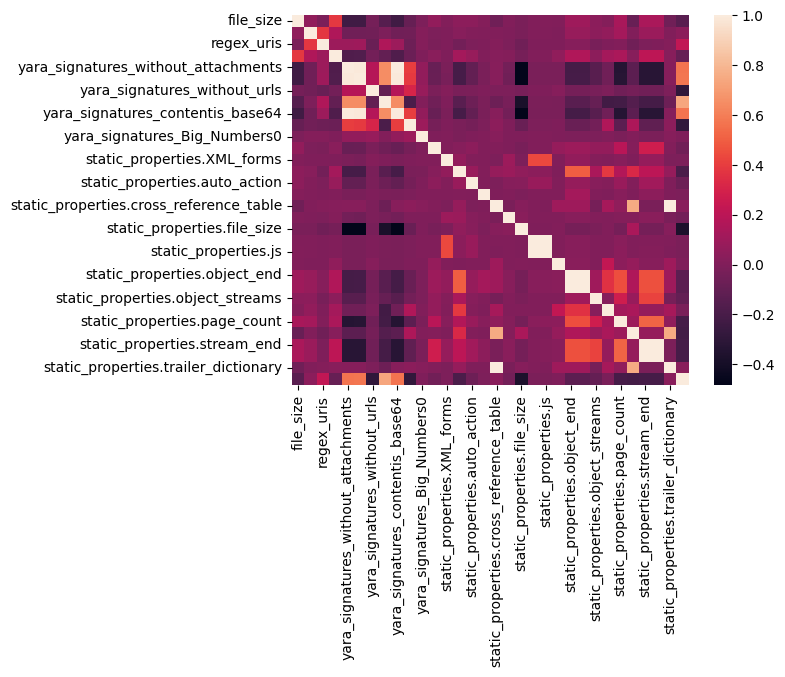

In [ ]:
sns.heatmap(bm_file.corr())
plt.show()

##EDA

<Axes: >

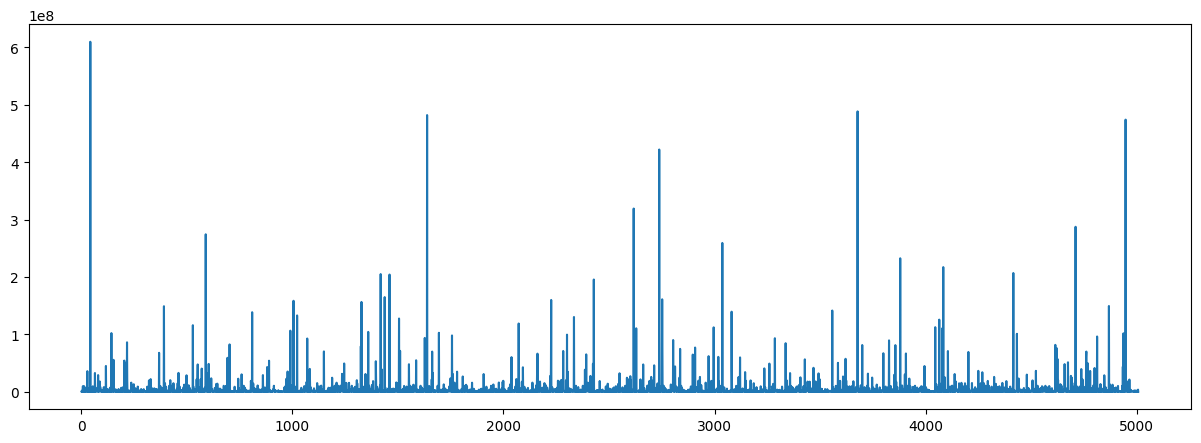

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
bm_file[bm_file['target']==0]['file_size'].plot()

Inference - In Benign pdf files, there are less files of greater sizes.

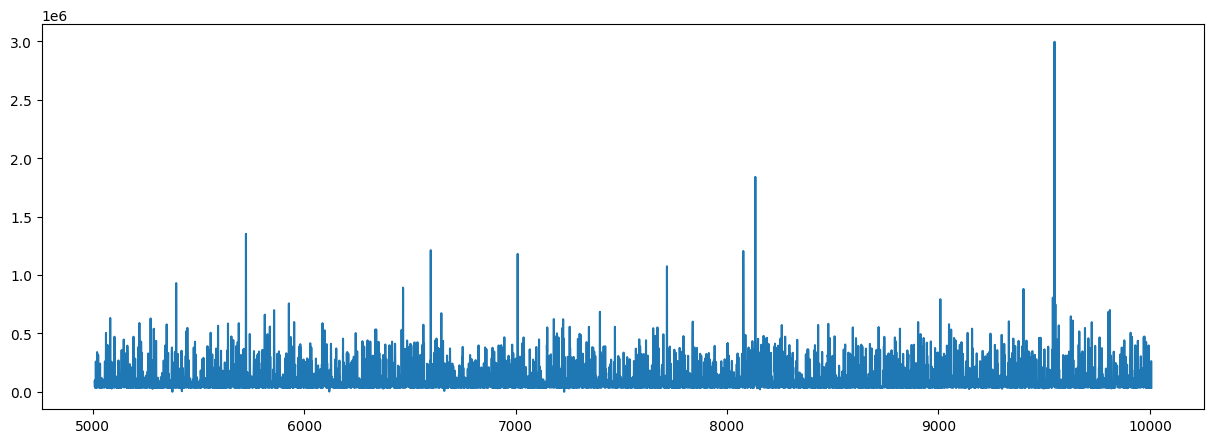

In [ ]:
plt.figure(figsize=(15,5))
bm_file[bm_file['target']==1]['file_size'].plot()
plt.show()

Inference - In Malicious pdf files, there are more files of greater sizes.

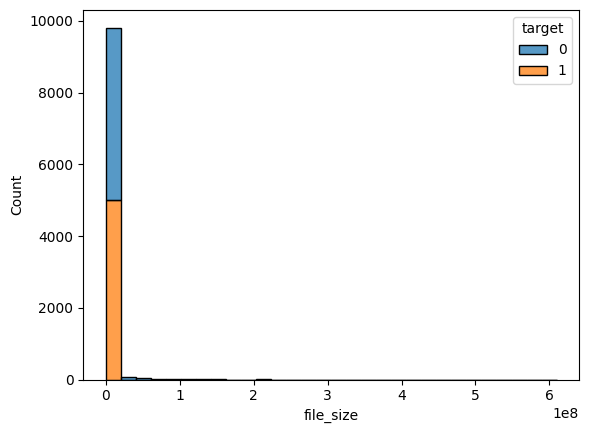

In [ ]:
sns.histplot(x='file_size', data=bm_file, hue='target', multiple='stack', bins=30)
plt.show()

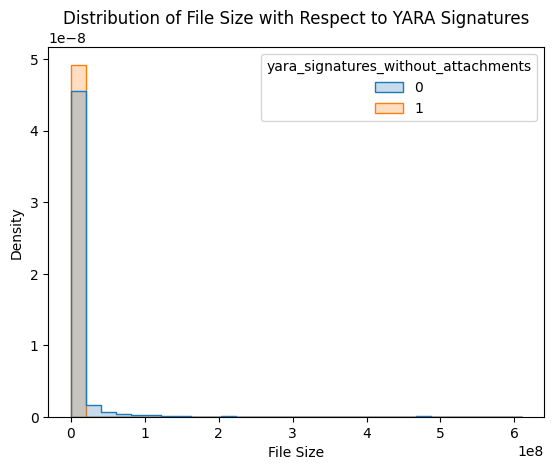

In [ ]:
sns.histplot(x='file_size', data=bm_file, hue='yara_signatures_without_attachments', bins=30, element='step', stat='density', common_norm=False)
plt.xlabel('File Size')
plt.title('Distribution of File Size with Respect to YARA Signatures')
plt.show()

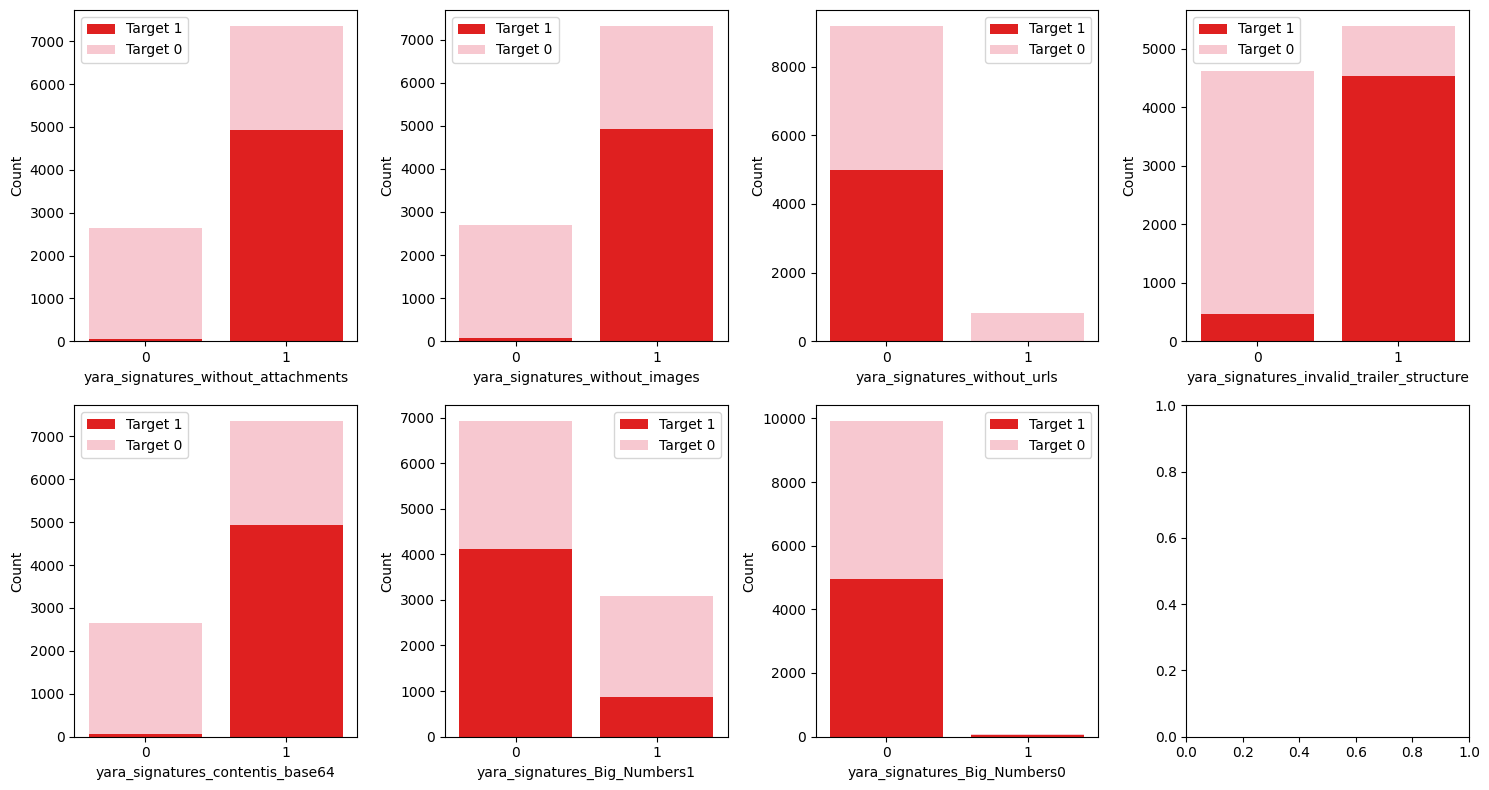

In [ ]:
yara_signature_features = [
    'yara_signatures_without_attachments',
    'yara_signatures_without_images',
    'yara_signatures_without_urls',
    'yara_signatures_invalid_trailer_structure',
    'yara_signatures_contentis_base64',
    'yara_signatures_Big_Numbers1',
    'yara_signatures_Big_Numbers0'
]
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()
for i, feature in enumerate(yara_signature_features):
    target_1_counts = bm_file[bm_file['target'] == 1][feature].value_counts()
    target_0_counts = bm_file[bm_file['target'] == 0][feature].value_counts()
    df_counts = pd.DataFrame({'Target 1': target_1_counts, 'Target 0': target_0_counts})
    sns.barplot(x=df_counts.index, y='Target 1', data=df_counts, ax=axes[i], color='red', label='Target 1')
    sns.barplot(x=df_counts.index, y='Target 0', data=df_counts, ax=axes[i], color='pink', label='Target 0', bottom=df_counts['Target 1'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend()
plt.tight_layout()
plt.show()

Yara Signatures features are dependent on target labels. Files that are malicious and contains yara signatures are higher in number as compared to malicious files which does not contain yara signatures.    

In [ ]:
bm_file['file_size']=bm_file['file_size']/1000
bm_file['file_size']

0         516.840
1        1383.675
2        1284.712
3         455.619
4        2350.818
           ...   
10003      49.587
10004      34.997
10005      37.093
10006     263.126
10007      35.869
Name: file_size, Length: 10008, dtype: float64

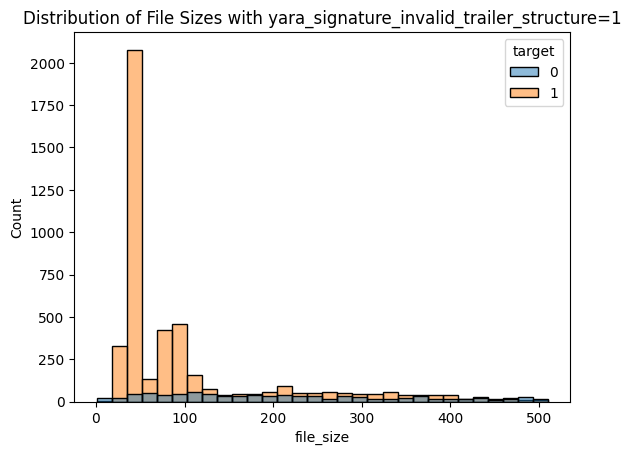

In [ ]:
sns.histplot(data=bm_file[bm_file['yara_signatures_invalid_trailer_structure'] == 1], x='file_size', hue='target', bins=30)
plt.title('Distribution of File Sizes with yara_signature_invalid_trailer_structure=1')
plt.show()

In [ ]:
bm_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   file_size                                      10008 non-null  float64
 1   pypdf_uris                                     10008 non-null  int64  
 2   regex_uris                                     10008 non-null  int64  
 3   regex_urls                                     10008 non-null  int64  
 4   yara_signatures_without_attachments            10008 non-null  int64  
 5   yara_signatures_without_images                 10008 non-null  int64  
 6   yara_signatures_without_urls                   10008 non-null  int64  
 7   yara_signatures_invalid_trailer_structure      10008 non-null  int64  
 8   yara_signatures_contentis_base64               10008 non-null  int64  
 9   yara_signatures_Big_Numbers1                   100

##Model Training with KNN Classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,balanced_accuracy_score,classification_report
from sklearn.svm import SVC

In [ ]:
X=bm_file.iloc[:,:-2]
Y=bm_file['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Train_Test_Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=42)

In [ ]:
x_train,y_train

(array([[-0.09989641, -0.18869785, -0.27738647, ..., -0.51293115,
         -0.21534193, -0.21581731],
        [-0.11848455, -0.18869785, -0.27738647, ...,  0.51519121,
          0.40063225,  0.39980477],
        [-0.14561185,  0.058955  ,  0.32503255, ..., -0.51293115,
         -0.21534193, -0.21581731],
        ...,
        [-0.1349582 ,  0.18278143,  0.62624207, ...,  0.51519121,
         -0.19070296, -0.19119243],
        [ 1.63749644, -0.18869785, -0.27738647, ..., -0.51293115,
          1.10758108,  1.1063495 ],
        [-0.14503672,  0.058955  ,  0.32503255, ..., -0.51293115,
         -0.21344662, -0.21392309]]),
 3707    0
 4767    0
 8419    1
 7037    1
 5914    1
        ..
 5734    1
 5191    1
 5390    1
 860     0
 7270    1
 Name: target, Length: 7506, dtype: int64)

##Hyperparameter Tuning to find Optimal k which gives less False Positive Rate.

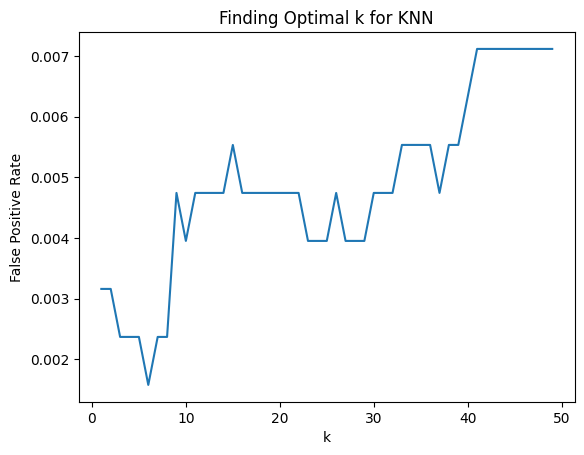

In [ ]:
fpr=[]
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i,weights='distance',metric='manhattan')
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
  fpr.append(fp/(fp+tn))
plt.plot([i for i in range(1,50)],fpr)
plt.title('Finding Optimal k for KNN')
plt.xlabel('k')
plt.ylabel('False Positive Rate')
plt.show()

##Confusion Matrix and FPR and Detection Rate

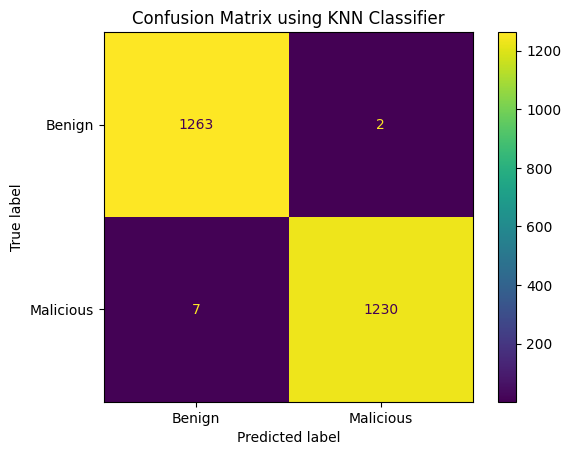

False Positive Rate: 0.0015810276679841897
True Positive Rate:0.994341147938561
Accuracy Score: 0.9964028776978417


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=6,weights='distance',metric='manhattan')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Benign','Malicious']).plot()
plt.title('Confusion Matrix using KNN Classifier')
plt.show()
print(f'False Positive Rate: {fp/(fp+tn)}\nTrue Positive Rate:{tp/(tp+fn)}\nAccuracy Score: {accuracy_score(y_test,y_pred)}')

**Performance metrics of KNN Classifier**                                        

**False Positive Rate: 0.15 %**

**Detection Rate/True Positive Rate: 99.43 %**


##Model Training with Random Forest Classifier.

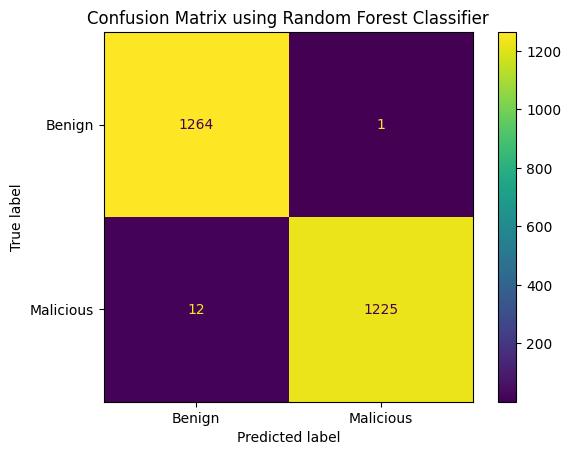

False Positive Rate: 0.0007905138339920949
True Positive Rate:0.9902991107518189
Accuracy Score: 0.9948041566746603


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 2,max_depth=50,random_state=42,max_features='log2')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Benign','Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()
print(f'False Positive Rate: {fp/(fp+tn)}\nTrue Positive Rate:{tp/(tp+fn)}\nAccuracy Score: {accuracy_score(y_test,y_pred)}')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=20)
rf=RandomForestClassifier(n_estimators = 2,max_depth=50,random_state=42,max_features='log2')
accuracy_scores = cross_val_score(rf,X_scaled,Y, cv=kf, scoring='accuracy')

In [ ]:
accuracy_scores

array([0.99600798, 0.99800399, 0.99600798, 0.99800399, 0.99800399,
       0.99800399, 0.99201597, 0.99401198, 1.        , 1.        ,
       0.974     , 0.986     , 0.988     , 0.984     , 0.978     ,
       0.994     , 0.986     , 0.984     , 0.984     , 0.982     ])

In [ ]:
accuracy_scores.mean()

0.9905029940119761

**Performance metrics of Random Forest Classifier**                                        

**False Positive Rate: 0.079 %**

**Detection Rate/True Positive Rate: 99.03 %**

**Mean Accuracy Score using K Fold: 99.05 %**



In [ ]:
rf = RandomForestClassifier(n_estimators=2, max_depth=50, random_state=42, max_features='log2')
rf.fit(x_train, y_train)

pred_prob1 = rf.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:, 1])

print("True Positive Rate (Sensitivity)    False Positive Rate (1 - Specificity)           Threshold")
for dr, fp, thr in zip(tpr1, fpr1, thresh1):
    print(f'{dr:.4f}                                {fp:.4f}                                          {thr:.4f}')

True Positive Rate (Sensitivity)    False Positive Rate (1 - Specificity)           Threshold
0.0000                                0.0000                                          2.0000
0.9871                                0.0008                                          1.0000
0.9887                                0.0008                                          0.9286
0.9903                                0.0008                                          0.7500
0.9968                                0.0190                                          0.5000
1.0000                                1.0000                                          0.0000


**By estimating different probabilities I got different values of False Positive Rate and True Positive rate in which False Positive Rate falls below  0.1% for 4 probability estimates out of which Highest Detection Rate is 99.03% for False Positve Rate 0.08% at THRESHOLD 0.75.**

##ROC CURVE

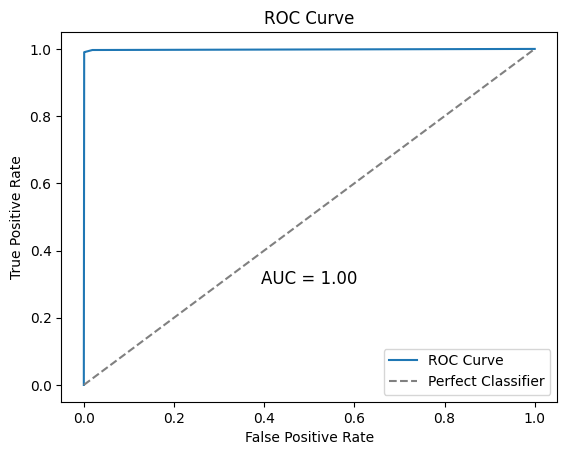

In [ ]:
plt.plot(fpr1, tpr1, label='ROC Curve')
plt.ylabel([i for i in np.arange(0.0,1.1,0.1)])
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Classifier')
roc_auc = auc(fpr1, tpr1)
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', ha='center', fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##Model Training with XGB Classifier.

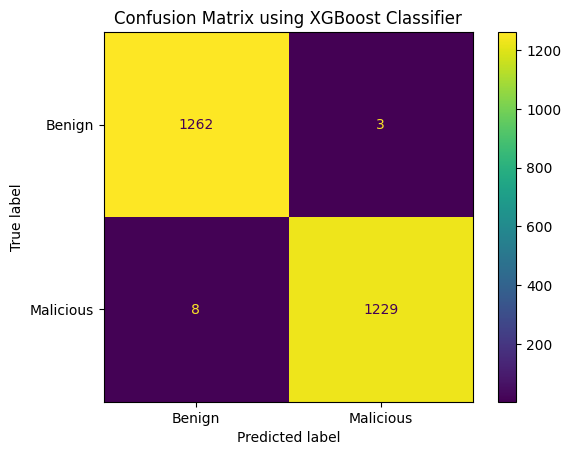

False Positive Rate: 0.0023715415019762848
True Positive Rate:0.9935327405012127
Accuracy Score: 0.995603517186251


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=200, learning_rate=0.2,max_depth=50, objective='binary:logistic',random_state=42)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Benign','Malicious']).plot()
plt.title('Confusion Matrix using XGBoost Classifier')
plt.show()
print(f'False Positive Rate: {fp/(fp+tn)}\nTrue Positive Rate:{tp/(tp+fn)}\nAccuracy Score: {accuracy_score(y_test,y_pred)}')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=20)
xgb=XGBClassifier(n_estimators=200, learning_rate=0.2,max_depth=50, objective='binary:logistic',random_state=42)
accuracy_scores = cross_val_score(xgb,X_scaled,Y, cv=kf, scoring='accuracy')

In [ ]:
accuracy_scores

array([0.99600798, 0.99401198, 0.99600798, 0.99201597, 0.99800399,
       0.99800399, 0.99001996, 0.99401198, 0.996     , 0.998     ,
       0.996     , 0.992     , 0.996     , 0.996     , 0.99      ,
       0.998     , 0.994     , 0.992     , 0.996     , 0.992     ])

In [ ]:
accuracy_scores.mean()

0.9947041916167665

**Performance metrics of XGBoost Classifier**                                        

**False Positive Rate: 0.23 %**

**Detection Rate/True Positive Rate: 99.35 %**

**Mean Accuracy Score using K Fold: 99.47 %**




##Best Performance is achieved with Random Forest Classifier.
## Threshold - 0.75
## False Positive Rate - 0.08 %
## Detection Rate - 99.03 %